# Лабраторна робота 3 
## Студента групи МІТ-31 
### Ярощука Назара Юрійовича 

Створити набір даних за допомогою DatasetGenerator

In [273]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
x,y=sklearn.datasets.make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df1 = pd.DataFrame(x, y)
df1.to_csv("datasetGenerator.csv")
df1.head()

,0,1,2,3,4
0,1.800948,-0.281471,-2.322147,-0.556990,0.382144
0,0.017767,-1.012079,-1.563320,-1.638107,1.632257
0,-0.678112,-1.599191,-0.226817,-0.957363,1.020249
1,0.872599,-0.462520,-0.364471,0.536316,-0.618996
0,-2.954968,0.629006,1.609136,-1.418849,1.699840


In [274]:
df1.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.039158,0.016135,0.056078,0.018033,-0.014216
std,1.404964,1.010032,2.087221,1.355337,1.329941
min,-4.048973,-3.609287,-5.816855,-3.584054,-4.408392
25%,-1.072694,-0.612642,-1.544483,-1.023630,-1.059383
50%,-0.241797,-0.003148,0.020673,-0.416324,0.446374
75%,1.007372,0.641922,1.594043,1.063717,0.977466
max,4.619969,3.835007,6.095279,4.563116,3.640313


In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [276]:
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

In [277]:
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

In [278]:
# creating predictions 
y_pred = log_model.predict(Scaled_X_test)

In [279]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [280]:
confusion_matrix(y_test, y_pred)

array([[105,   4],
       [ 10,  81]], dtype=int64)

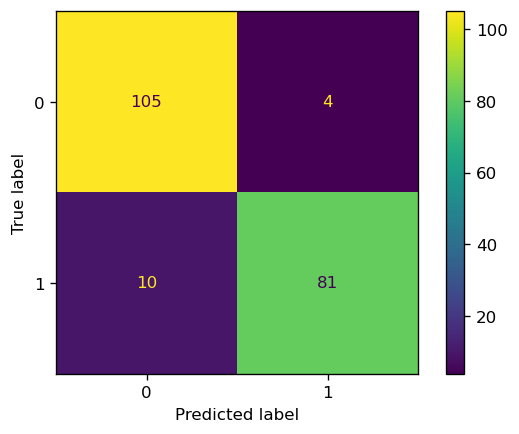

In [281]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [282]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.93

In [283]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       109
           1       0.95      0.89      0.92        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

In [284]:
df2=pd.read_csv("gender.csv")
df2.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [285]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  999 non-null    int64  
 1   forehead_width_cm          999 non-null    float64
 2   forehead_height_cm         999 non-null    float64
 3   nose_wide                  999 non-null    int64  
 4   nose_long                  999 non-null    int64  
 5   lips_thin                  999 non-null    int64  
 6   distance_nose_to_lip_long  999 non-null    int64  
 7   gender                     999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [286]:
df2.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,0.859860,13.176176,5.97037,0.496496,0.506507,0.495495,0.506507
std,0.347306,1.099432,0.53381,0.500238,0.500208,0.500230,0.500208
min,0.000000,11.400000,5.10000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.50000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,6.00000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,14.000000,6.40000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.10000,1.000000,1.000000,1.000000,1.000000


In [287]:
df2["gender"].value_counts()

Male      504
Female    495
Name: gender, dtype: int64

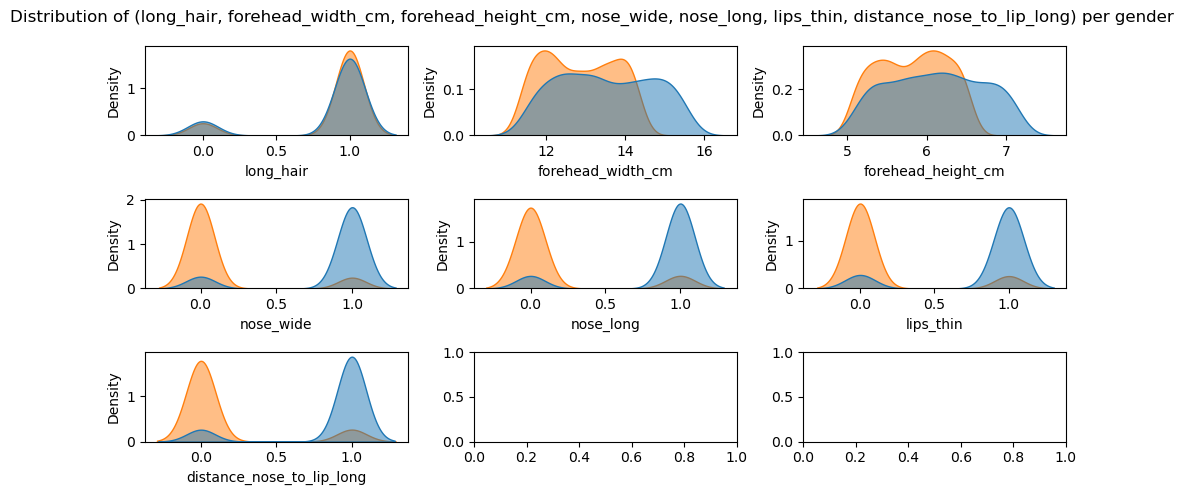

In [288]:
fig, axes = plt.subplots(3, 3, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long) per gender')

# Distribution of sepal length per Species
sns.kdeplot(ax = axes[0,0], data = df2, x = 'long_hair', hue = "gender", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("long_hair")
axes[0,0].get_legend().remove()

sns.kdeplot(ax = axes[0,1], data = df2, x = 'forehead_width_cm', hue = "gender", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("forehead_width_cm")
axes[0,1].get_legend().remove()

sns.kdeplot(ax = axes[0,2], data = df2, x = 'forehead_height_cm', hue = "gender", alpha = 0.5, shade = True)
axes[0,2].set_xlabel("forehead_height_cm")
axes[0,2].get_legend().remove()

sns.kdeplot(ax = axes[1,0], data = df2, x = 'nose_wide', hue = "gender", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("nose_wide")
axes[1,0].get_legend().remove()

sns.kdeplot(ax = axes[1,1], data = df2, x = 'nose_long', hue = "gender", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("nose_long")
axes[1,1].get_legend().remove()

sns.kdeplot(ax = axes[1,2], data = df2, x = 'lips_thin', hue = "gender", alpha = 0.5, shade = True)
axes[1,2].set_xlabel("lips_thin")
axes[1,2].get_legend().remove()

sns.kdeplot(ax = axes[2,0], data = df2, x = 'distance_nose_to_lip_long', hue = "gender", alpha = 0.5, shade = True)
axes[2,0].set_xlabel("distance_nose_to_lip_long")
axes[2,0].get_legend().remove()


plt.tight_layout()

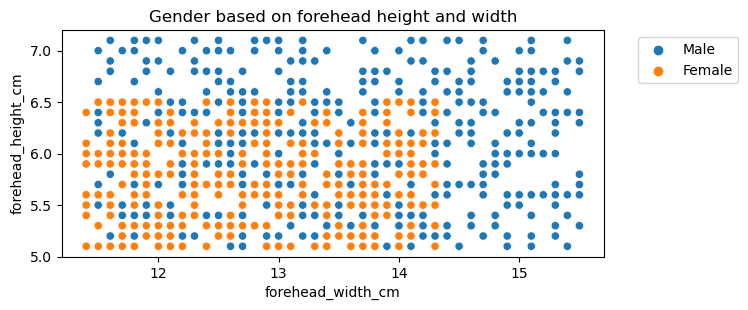

In [289]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df2, x = 'forehead_width_cm', y = 'forehead_height_cm', hue = "gender")
plt.title("Gender based on forehead height and width")
plt.xlabel("forehead_width_cm")
plt.ylabel("forehead_height_cm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

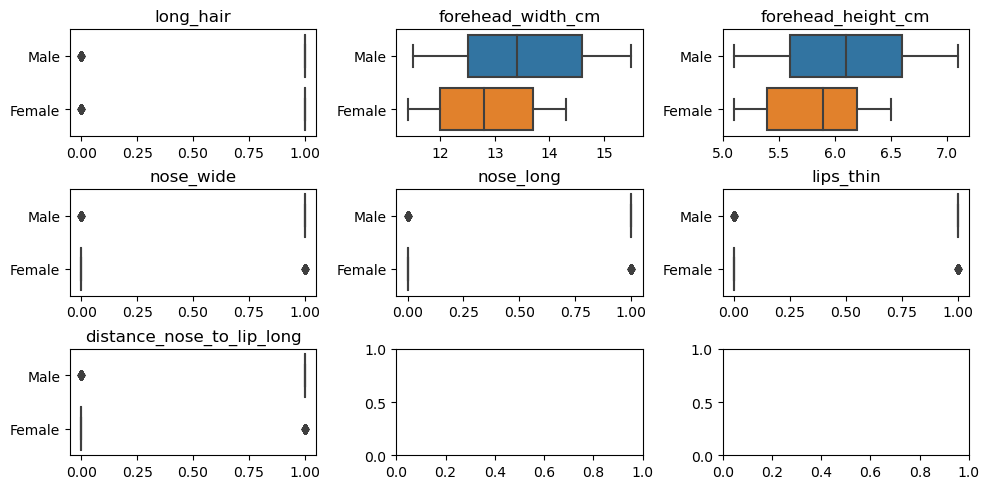

In [290]:
fig, axes = plt.subplots(3, 3, figsize=(10,5), dpi = 100)

sns.boxplot(ax = axes[0,0], data = df2, x = 'long_hair', y = "gender")
axes[0,0].set_title("long_hair")
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)

sns.boxplot(ax = axes[0,1], data = df2, x = 'forehead_width_cm', y = "gender")
axes[0,1].set_title("forehead_width_cm")
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)

sns.boxplot(ax = axes[0,2], data = df2, x = 'forehead_height_cm', y = "gender",)
axes[0,2].set_title("forehead_height_cm")
axes[0,2].set_xlabel(None)
axes[0,2].set_ylabel(None)

sns.boxplot(ax = axes[1,0], data = df2, x = 'nose_wide', y = "gender")
axes[1,0].set_title("nose_wide")
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)

sns.boxplot(ax = axes[1,1], data = df2, x = 'nose_long', y = "gender")
axes[1,1].set_title("nose_long")
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)

sns.boxplot(ax = axes[1,2], data = df2, x = 'lips_thin', y = "gender")
axes[1,2].set_title("lips_thin")
axes[1,2].set_xlabel(None)
axes[1,2].set_ylabel(None)

sns.boxplot(ax = axes[2,0], data = df2, x = 'distance_nose_to_lip_long', y = "gender")
axes[2,0].set_title("distance_nose_to_lip_long")
axes[2,0].set_xlabel(None)
axes[2,0].set_ylabel(None)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

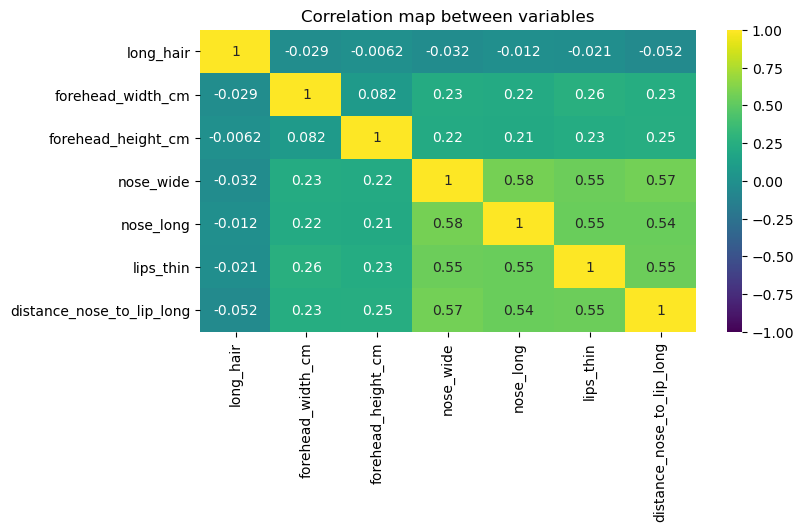

In [291]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df2.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
#plt.xticks(rotation = 90)
plt.show()

In [292]:
X = df2.drop("gender", axis = 1)
y = df2["gender"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [293]:
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

In [294]:
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

In [295]:
y_pred = log_model.predict(Scaled_X_test)

In [296]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [297]:
confusion_matrix(y_test, y_pred)

array([[98, 10],
       [ 3, 89]], dtype=int64)

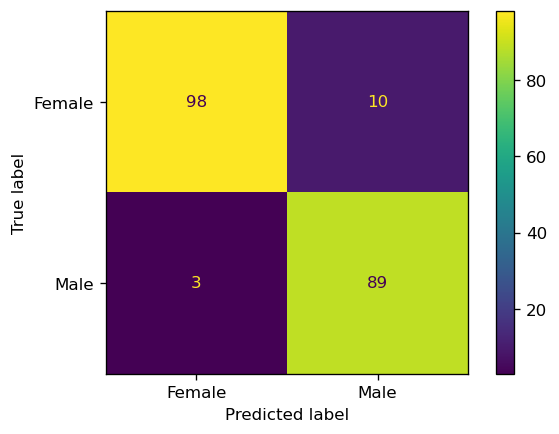

In [298]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [299]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.94

In [300]:
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

              precision    recall  f1-score   support

      Female       0.97      0.91      0.94       108
        Male       0.90      0.97      0.93        92

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



(опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.



In [301]:
sex = {0:'Female', 1:'Male'}
sick_coronavirus = {0:'No', 1:'Yes'}
vaccine = {0:'Dont have', 1:'Have'}
type_of_vaccine = {0:'Pfizer', 1:'Moderna', 2: 'AstraZeneca', 3: 'Covaxin'}
citizenship = {0:'Ukrainian', 1:'Poland', 2:'Portugal', 3:'Germany'}
info = []
for i in range(0, 256):
    row = []
    row.append(sex[rnd.randint(0, 1)])
    row.append(sick_coronavirus[rnd.randint(0, 1)])
    row.append(vaccine[rnd.randint(0, 1)])
    row.append(type_of_vaccine[rnd.randint(0, 3)])
    row.append(citizenship[rnd.randint(0, 3)])
    info.append(row)
df3 = pd.DataFrame(info, columns=['sex', 'sick_coronavirus', 'vaccine', 'type_of_vaccine', 'citizenship'])
df3.to_csv('df3.csv')
df3.head()

,sex,sick_coronavirus,vaccine,type_of_vaccine,citizenship
0,Female,No,Have,Covaxin,Germany
1,Female,Yes,Dont have,Moderna,Poland
2,Female,Yes,Dont have,AstraZeneca,Germany
3,Male,No,Have,Covaxin,Portugal
4,Female,No,Have,Moderna,Ukrainian


In [302]:
df3.replace({'Female': 0, 'Male':1, 'No': 0, 'Yes':1, 'Dont have':0, 'Have':1, 'Pfizer':0, 'Moderna':1, 'AstraZeneca':2, 'Covaxin':3, 'Ukrainian': 0, 'Poland':1, 'Portugal':2, 'Germany':3}, None, True)


In [303]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sex               256 non-null    int64
 1   sick_coronavirus  256 non-null    int64
 2   vaccine           256 non-null    int64
 3   type_of_vaccine   256 non-null    int64
 4   citizenship       256 non-null    int64
dtypes: int64(5)
memory usage: 10.1 KB


In [304]:
df3.describe()

,sex,sick_coronavirus,vaccine,type_of_vaccine,citizenship
count,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.496094,0.507812,0.488281,1.433594,1.582031
std,0.500964,0.500918,0.500842,1.114734,1.099514
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000


In [305]:
df3["citizenship"].value_counts()

3    69
1    68
2    65
0    54
Name: citizenship, dtype: int64

Text(0.5, 0, 'type_of_vaccine')

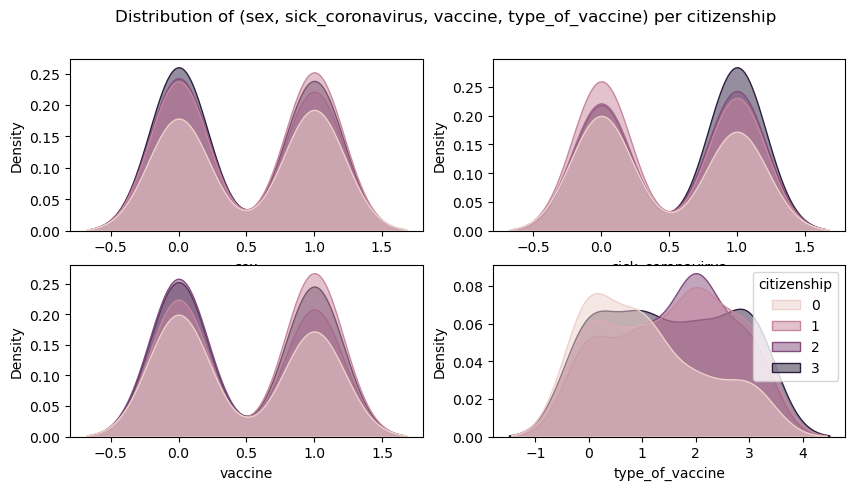

In [306]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (sex, sick_coronavirus, vaccine, type_of_vaccine) per citizenship')

# Distribution of sepal length per Species
sns.kdeplot(ax = axes[0,0], data = df3, x = 'sex', hue = "citizenship", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("sex")
axes[0,0].get_legend().remove()

# Distribution of sepal width per Species
sns.kdeplot(ax = axes[0,1], data = df3, x = 'sick_coronavirus', hue = "citizenship", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("sick_coronavirus")
axes[0,1].get_legend().remove()

# Distribution of petal length per Species
sns.kdeplot(ax = axes[1,0], data = df3, x = 'vaccine', hue = "citizenship", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("vaccine")
axes[1,0].get_legend().remove()

# Distribution of petal width per Species
sns.kdeplot(ax = axes[1,1], data = df3, x = 'type_of_vaccine', hue = "citizenship", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("type_of_vaccine")

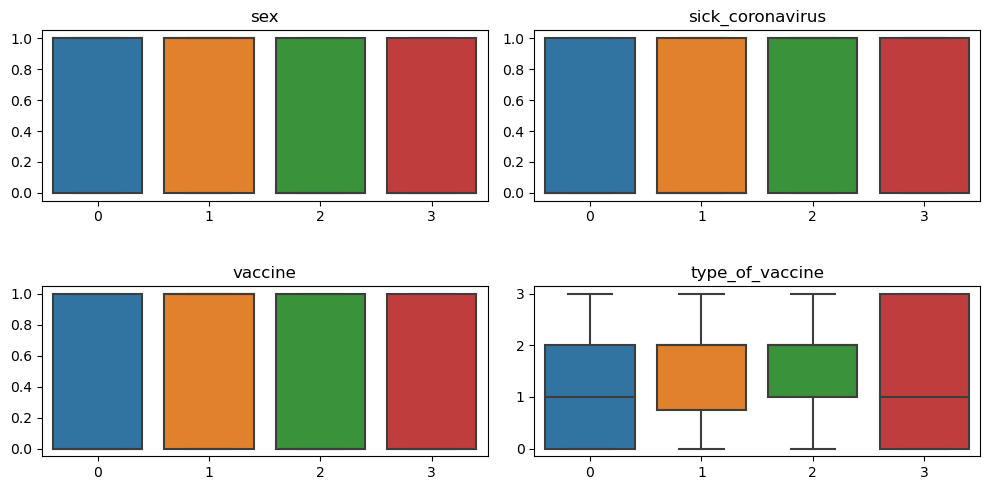

In [307]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)

#Mean Sepal Length
sns.boxplot(ax = axes[0,0], data = df3, x = "citizenship", y = 'sex')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("sex")


#Mean Sepal Width
sns.boxplot(ax = axes[0,1], data = df3, x = "citizenship", y = 'sick_coronavirus')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("sick_coronavirus")

#Mean Petal Length
sns.boxplot(ax = axes[1,0], data = df3, x = "citizenship", y = 'vaccine')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("vaccine")

#Mean Petal Width
sns.boxplot(ax = axes[1,1], data = df3, x = "citizenship", y = 'type_of_vaccine')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("type_of_vaccine")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

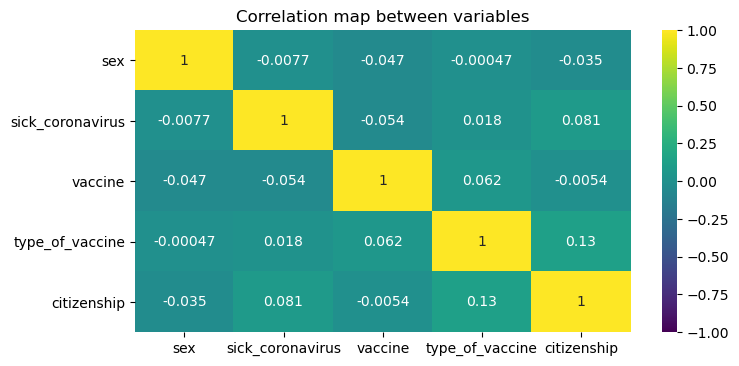

In [308]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df3.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
plt.show()

In [309]:
X = df3.drop("citizenship", axis = 1)
y = df3["citizenship"]

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train)

LogisticRegression()

In [311]:
y_pred = log_model.predict(Scaled_X_test)


In [312]:
confusion_matrix(y_test, y_pred)


array([[3, 2, 3, 6],
       [2, 4, 4, 5],
       [3, 1, 1, 6],
       [0, 4, 4, 4]], dtype=int64)

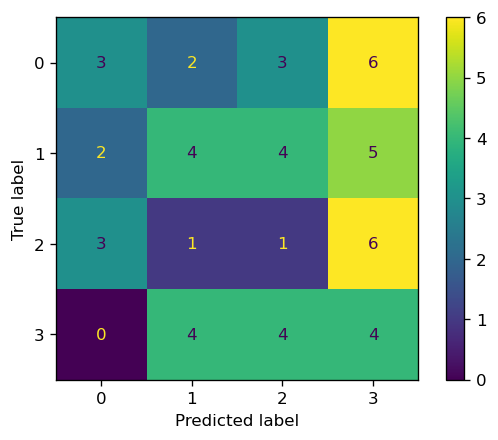

In [313]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [314]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.23

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.21      0.27        14
           1       0.36      0.27      0.31        15
           2       0.08      0.09      0.09        11
           3       0.19      0.33      0.24        12

    accuracy                           0.23        52
   macro avg       0.25      0.23      0.23        52
weighted avg       0.27      0.23      0.24        52

